In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re

%matplotlib inline
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

Load CSV files

In [2]:
divvyQ119 = pd.read_csv('../data/Chicago_Divvy/Divvy_Trips_2019_Q1.csv')
divvyQ219 = pd.read_csv('../data/Chicago_Divvy/Divvy_Trips_2019_Q2.csv')
divvyQ319 = pd.read_csv('../data/Chicago_Divvy/Divvy_Trips_2019_Q3.csv')
divvyQ419 = pd.read_csv('../data/Chicago_Divvy/Divvy_Trips_2019_Q4.csv')
divvyQ120 = pd.read_csv('../data/Chicago_Divvy/Divvy_Trips_2020_Q1.csv')
divvy0420 = pd.read_csv('../data/Chicago_Divvy/202004-divvy-tripdata.csv')
divvy0520 = pd.read_csv('../data/Chicago_Divvy/202005-divvy-tripdata.csv')
divvy0620 = pd.read_csv('../data/Chicago_Divvy/202006-divvy-tripdata.csv')
divvy0720 = pd.read_csv('../data/Chicago_Divvy/202007-divvy-tripdata.csv')
divvy0820 = pd.read_csv('../data/Chicago_Divvy/202008-divvy-tripdata.csv')
divvy0920 = pd.read_csv('../data/Chicago_Divvy/202009-divvy-tripdata.csv')
divvy1020 = pd.read_csv('../data/Chicago_Divvy/202010-divvy-tripdata.csv')
divvy1120 = pd.read_csv('../data/Chicago_Divvy/202011-divvy-tripdata.csv')
divvy1220 = pd.read_csv('../data/Chicago_Divvy/202012-divvy-tripdata.csv')
divvy0121 = pd.read_csv('../data/Chicago_Divvy/202101-divvy-tripdata.csv')
divvy0221 = pd.read_csv('../data/Chicago_Divvy/202102-divvy-tripdata.csv')
divvy0321 = pd.read_csv('../data/Chicago_Divvy/202103-divvy-tripdata.csv')
divvy0421 = pd.read_csv('../data/Chicago_Divvy/202104-divvy-tripdata.csv')

Choose Only Necessary Columns

In [3]:
divvy0420.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [4]:
divvyQ119 = divvyQ119[['trip_id', 'start_time', 'end_time', 'from_station_id', 'to_station_id']]
divvyQ219 = divvyQ219[['01 - Rental Details Rental ID', '01 - Rental Details Local Start Time', '01 - Rental Details Local End Time', '03 - Rental Start Station ID', '02 - Rental End Station ID']]
divvyQ319 = divvyQ319[['trip_id', 'start_time', 'end_time', 'from_station_id', 'to_station_id']]
divvyQ419 = divvyQ419[['trip_id', 'start_time', 'end_time', 'from_station_id', 'to_station_id']]
divvyQ120 = divvyQ120[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0420 = divvy0420[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0520 = divvy0520[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0520 = divvy0520[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0620 = divvy0620[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0720 = divvy0720[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0820 = divvy0820[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0920 = divvy0920[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy1020 = divvy1020[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy1120 = divvy1120[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy1220 = divvy1220[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0121 = divvy0121[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0221 = divvy0221[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0321 = divvy0321[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]
divvy0421 = divvy0421[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]

Change Date Time

In [5]:
# def change_dt(df, start_col, end_col):
#     df[start_col] = pd.to_datetime(df[start_col], format='%Y-%m-%d')
#     df[end_col] = pd.to_datetime(df[end_col], format='%Y-%m-%d')
#     return df


In [6]:
# change_dt(divvyQ120, 'started_at', 'ended_at')

In [7]:
divvyQ119['start_time'] = pd.to_datetime(divvyQ119['start_time'], format='%Y-%m-%d')
divvyQ119['end_time'] = pd.to_datetime(divvyQ119['end_time'], format='%Y-%m-%d')

divvyQ219['01 - Rental Details Local Start Time'] = pd.to_datetime(divvyQ219['01 - Rental Details Local Start Time'], format='%Y-%m-%d')
divvyQ219['01 - Rental Details Local End Time'] = pd.to_datetime(divvyQ219['01 - Rental Details Local End Time'], format='%Y-%m-%d')

divvyQ319['start_time'] = pd.to_datetime(divvyQ319['start_time'], format='%Y-%m-%d')
divvyQ319['end_time'] = pd.to_datetime(divvyQ319['end_time'], format='%Y-%m-%d')

divvyQ419['start_time'] = pd.to_datetime(divvyQ419['start_time'], format='%Y-%m-%d')
divvyQ419['end_time'] = pd.to_datetime(divvyQ419['end_time'], format='%Y-%m-%d')

divvyQ120['started_at'] = pd.to_datetime(divvyQ120['started_at'], format='%Y-%m-%d')
divvyQ120['ended_at'] = pd.to_datetime(divvyQ120['ended_at'], format='%Y-%m-%d')

divvy0420['started_at'] = pd.to_datetime(divvy0420['started_at'], format='%Y-%m-%d')
divvy0420['ended_at'] = pd.to_datetime(divvy0420['ended_at'], format='%Y-%m-%d')

divvy0520['started_at'] = pd.to_datetime(divvy0520['started_at'], format='%Y-%m-%d')
divvy0520['ended_at'] = pd.to_datetime(divvy0520['ended_at'], format='%Y-%m-%d')

divvy0620['started_at'] = pd.to_datetime(divvy0620['started_at'], format='%Y-%m-%d')
divvy0620['ended_at'] = pd.to_datetime(divvy0620['ended_at'], format='%Y-%m-%d')

divvy0720['started_at'] = pd.to_datetime(divvy0720['started_at'], format='%Y-%m-%d')
divvy0720['ended_at'] = pd.to_datetime(divvy0720['ended_at'], format='%Y-%m-%d')

divvy0820['started_at'] = pd.to_datetime(divvy0820['started_at'], format='%Y-%m-%d')
divvy0820['ended_at'] = pd.to_datetime(divvy0820['ended_at'], format='%Y-%m-%d')

divvy0920['started_at'] = pd.to_datetime(divvy0920['started_at'], format='%Y-%m-%d')
divvy0920['ended_at'] = pd.to_datetime(divvy0920['ended_at'], format='%Y-%m-%d')

divvy1020['started_at'] = pd.to_datetime(divvy1020['started_at'], format='%Y-%m-%d')
divvy1020['ended_at'] = pd.to_datetime(divvy1020['ended_at'], format='%Y-%m-%d')

divvy1120['started_at'] = pd.to_datetime(divvy1120['started_at'], format='%Y-%m-%d')
divvy1120['ended_at'] = pd.to_datetime(divvy1120['ended_at'], format='%Y-%m-%d')

divvy1220['started_at'] = pd.to_datetime(divvy1220['started_at'], format='%Y-%m-%d')
divvy1220['ended_at'] = pd.to_datetime(divvy1220['ended_at'], format='%Y-%m-%d')

divvy0121['started_at'] = pd.to_datetime(divvy0121['started_at'], format='%Y-%m-%d')
divvy0121['ended_at'] = pd.to_datetime(divvy0121['ended_at'], format='%Y-%m-%d')

divvy0221['started_at'] = pd.to_datetime(divvy0221['started_at'], format='%Y-%m-%d')
divvy0221['ended_at'] = pd.to_datetime(divvy0221['ended_at'], format='%Y-%m-%d')

divvy0321['started_at'] = pd.to_datetime(divvy0321['started_at'], format='%Y-%m-%d')
divvy0321['ended_at'] = pd.to_datetime(divvy0321['ended_at'], format='%Y-%m-%d')

divvy0421['started_at'] = pd.to_datetime(divvy0421['started_at'], format='%Y-%m-%d')
divvy0421['ended_at'] = pd.to_datetime(divvy0421['ended_at'], format='%Y-%m-%d')

Rename Columns for Merge

In [8]:
divvyQ119.rename(columns={'trip_id':'ride_id', 'start_time': 'started_at', 'end_time':'ended_at', 'from_station_id':'start_station_id', 'to_station_id':'end_station_id'}, inplace=True)
divvyQ219.rename(columns={'01 - Rental Details Rental ID':'ride_id', '01 - Rental Details Local Start Time': 'started_at', '01 - Rental Details Local End Time':'ended_at', '03 - Rental Start Station ID':'start_station_id', '02 - Rental End Station ID':'end_station_id'}, inplace=True)
divvyQ319.rename(columns={'trip_id':'ride_id', 'start_time': 'started_at', 'end_time':'ended_at', 'from_station_id':'start_station_id', 'to_station_id':'end_station_id'}, inplace=True)
divvyQ419.rename(columns={'trip_id':'ride_id', 'start_time': 'started_at', 'end_time':'ended_at', 'from_station_id':'start_station_id', 'to_station_id':'end_station_id'}, inplace=True)

In [9]:
divvyQ219.head()

,ride_id,started_at,ended_at,start_station_id,end_station_id
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,81,56
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,317,59
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,283,174
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,26,133
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,202,129


Concatenate All DFs

In [10]:
all_divvy = pd.concat([divvyQ119, divvyQ219, divvyQ319, divvyQ419, divvyQ120, divvy0420, divvy0520, divvy0620, divvy0720, divvy0820, divvy0920, divvy1020, divvy1120, divvy1220, divvy0121, divvy0221, divvy0321, divvy0421])

In [11]:
all_divvy.head()

,ride_id,started_at,ended_at,start_station_id,end_station_id
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35


Create Duration Column

In [12]:
all_divvy['duration'] = all_divvy['ended_at'] - all_divvy['started_at']

In [13]:
all_divvy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071869 entries, 0 to 337229
Data columns (total 6 columns):
 #   Column            Dtype          
---  ------            -----          
 0   ride_id           object         
 1   started_at        datetime64[ns] 
 2   ended_at          datetime64[ns] 
 3   start_station_id  object         
 4   end_station_id    object         
 5   duration          timedelta64[ns]
dtypes: datetime64[ns](2), object(3), timedelta64[ns](1)
memory usage: 431.1+ MB


Filter Out Data

In [14]:
all_divvy = all_divvy.dropna(subset=['start_station_id'])
all_divvy = all_divvy.dropna(subset=['end_station_id'])
all_divvy = all_divvy[~((all_divvy['start_station_id'] == all_divvy['end_station_id']) & (all_divvy['duration'] < '00:05:00'))]

Create Date Column

In [15]:
all_divvy['start_date'] = all_divvy['started_at'].dt.date

In [38]:
divvy_by_date = all_divvy.groupby('start_date').agg({'ride_id': 'count'}).reset_index()
divvy_by_date['start_date'] = pd.to_datetime(divvy_by_date['start_date'], format='%Y-%m-%d')
divvy_by_date.rename(columns={'start_date': 'ride_date', 'ride_id':'ride_count'}, inplace=True)

# divvy_by_date_1 = all_divvy.groupby(['start_date'])['ride_id'].count()
# divvy_by_date_1 = pd.DataFrame(divvy_by_date_1).reset_index()
# divvy_by_date_1['start_date'] = pd.to_datetime(divvy_by_date_1['start_date'], format='%Y-%m-%d')
# divvy_by_date_1.columns=[['ride_date', 'ride_count']]

In [39]:
divvy_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ride_date   849 non-null    datetime64[ns]
 1   ride_count  849 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.4 KB


In [40]:
divvy_by_date['month'] = divvy_by_date['ride_date'].dt.month
divvy_by_date['year'] = divvy_by_date['ride_date'].dt.year
divvy_by_date['m_y'] = divvy_by_date['month'].apply(str) + "-" + divvy_by_date['year'].apply(str) 

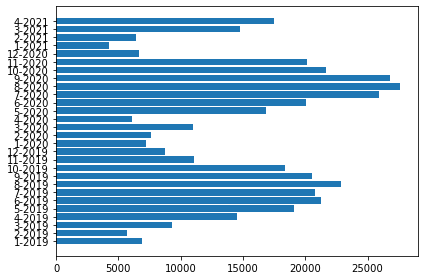

In [41]:
plt.barh('m_y', 'ride_count', data=divvy_by_date)
plt.tight_layout()

In [42]:
divvy_by_date.to_csv('divvy_by_date.csv')